In [1]:
from pytorch_forecasting import Baseline, NBeats
from Oanda_Data import OandaData
from DATALAKE.MANIPULATION.AI.DL.TIMESERIES.OHLC_Manipulate import OHLC_DF_to_CLASSIFICATION_C, OHLC_DF_to_REGRESSION_C
from DATALAKE.MANIPULATION.AI.DL.TIMESERIES.Data_to_PytorchForecasting import DF_to_TSDataSet
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
import torch
import pandas as pd
from pytorch_forecasting import Baseline, NBeats
from pytorch_forecasting.metrics import SMAPE

model_path = "C:\\Users\\Aleksander\\PycharmProjects\\BIGAI\\DATALAKE\\MANIPULATION\\AI\\DL\\TIMESERIES\\lightning_logs\\version_3\\checkpoints\\epoch=99-step=1499.ckpt"
best_model = NBeats.load_from_checkpoint(model_path)

data = pd.read_csv('OANDA_EUR_USD_H4.csv')
df = OHLC_DF_to_REGRESSION_C(data)

df_train = df.sample(frac = 0.7)
df_val = df.drop(df_train.index)

training, validation, train_dataloader, val_dataloader = DF_to_TSDataSet(df_train, df_val, max_encoder_length=60,max_prediction_length=1)

actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])

baseline_predictions = Baseline().predict(val_dataloader)
value = SMAPE()(baseline_predictions, actuals)
value = (actuals - baseline_predictions).abs().mean()
predictions = best_model.predict(val_dataloader)
value = (actuals - predictions).abs().mean()
print(value)

raw_predictions, x = best_model.predict(val_dataloader, mode="raw", return_x=True)
oko=3

C:\Users\Aleksander\anaconda3\envs\BIGAI\lib\site-packages\pytorch_forecasting\models\nbeats\sub_modules.py:154: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  coefficients = torch.tensor([backcast_linspace ** i for i in range(thetas_dim)], dtype=torch.float32)


tensor(0.0037)


C:\Users\Aleksander\anaconda3\envs\BIGAI\lib\site-packages\pytorch_forecasting\models\base_model.py:751: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


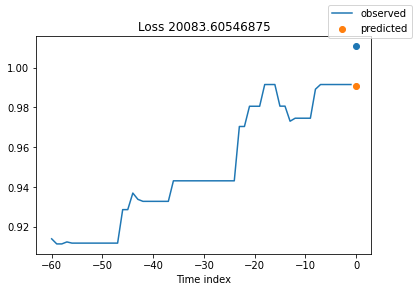

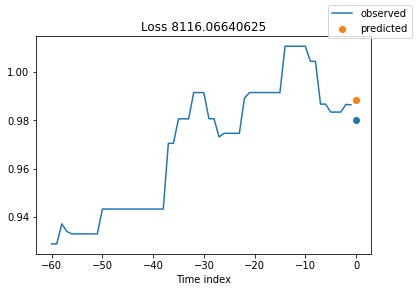

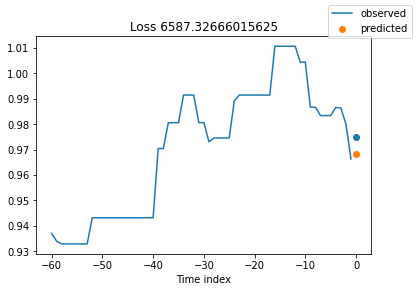

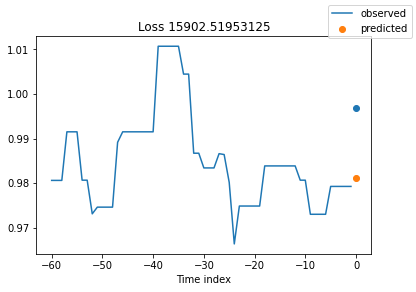

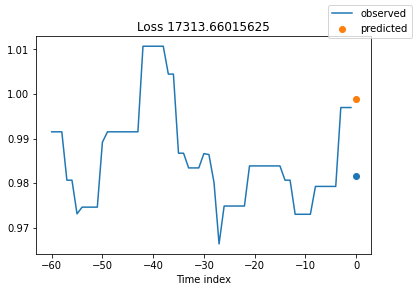

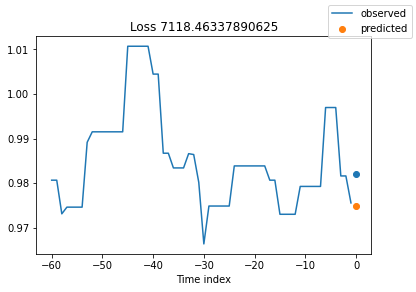

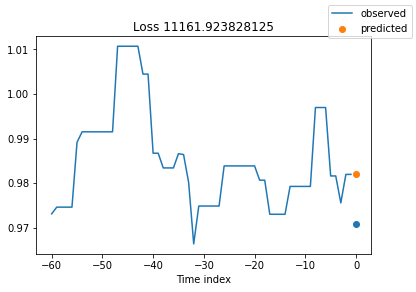

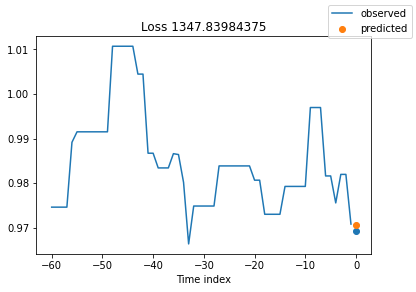

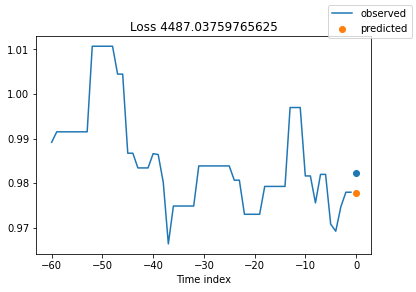

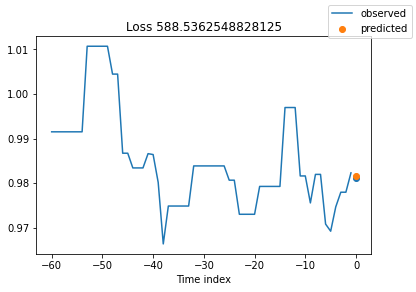

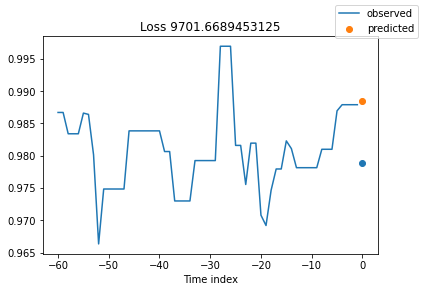

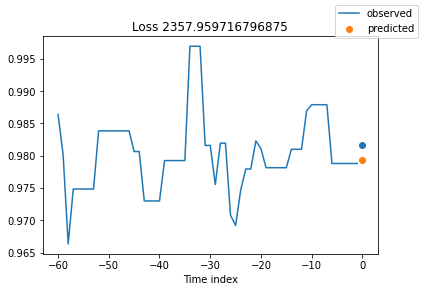

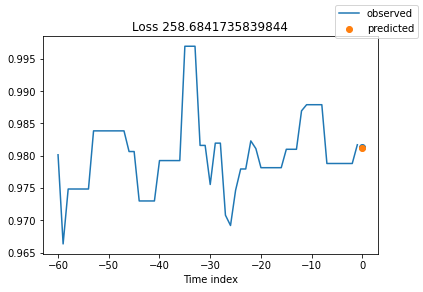

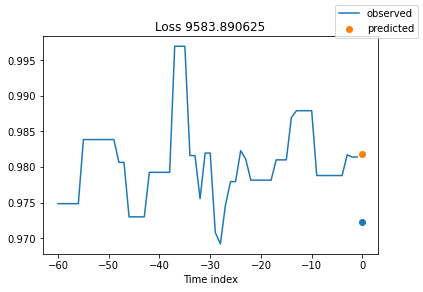

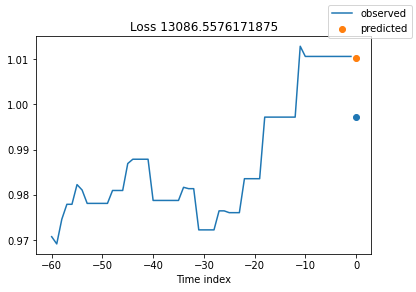

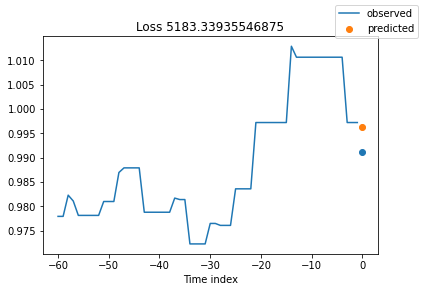

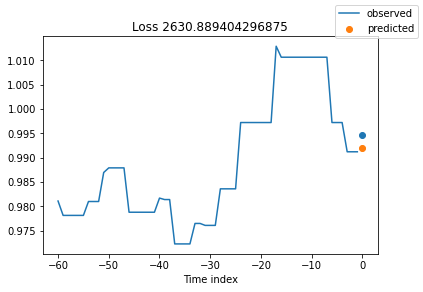

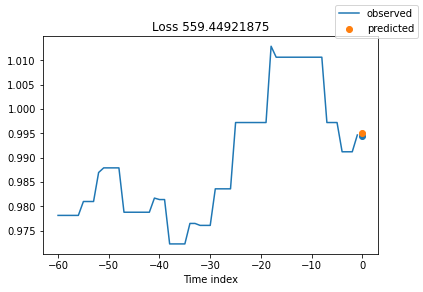

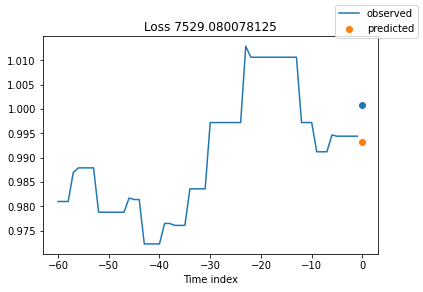

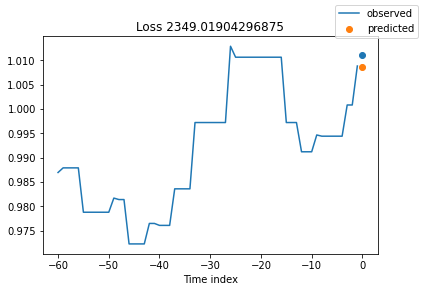

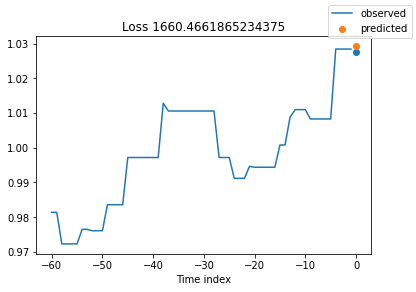

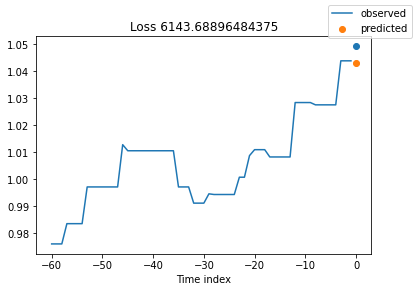

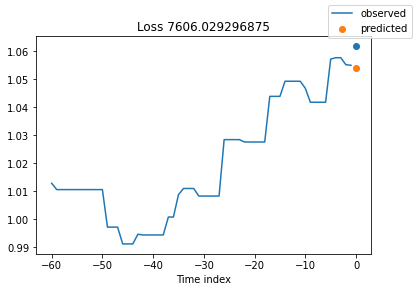

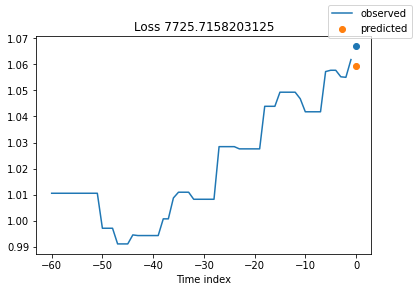

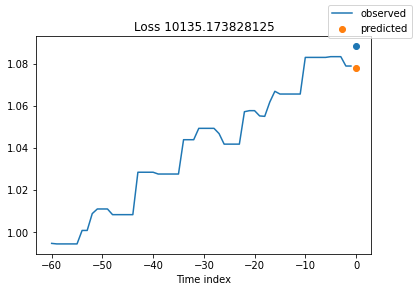

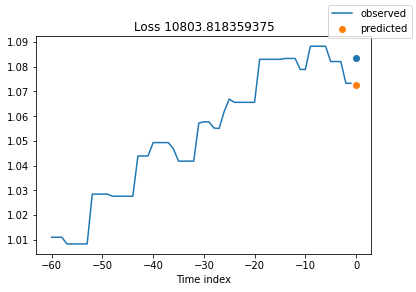

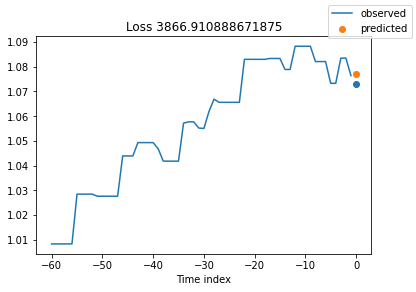

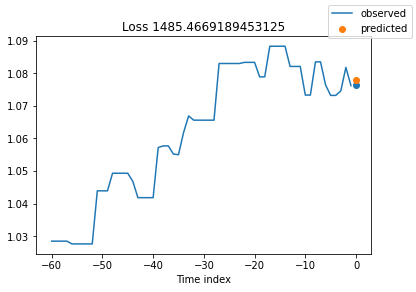

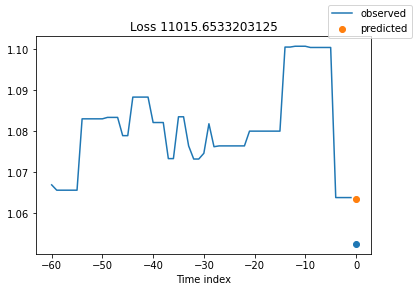

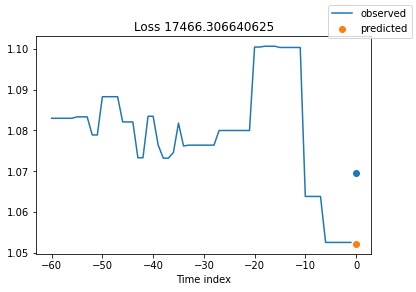

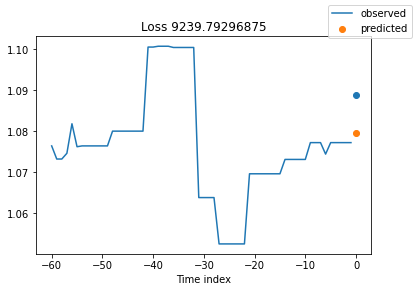

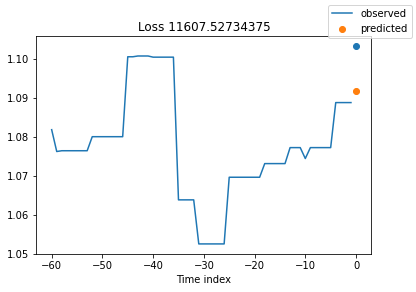

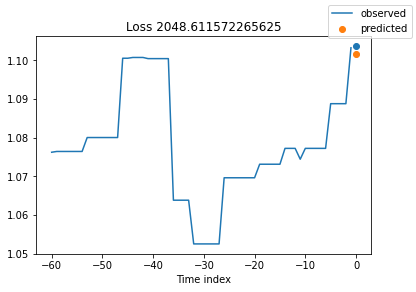

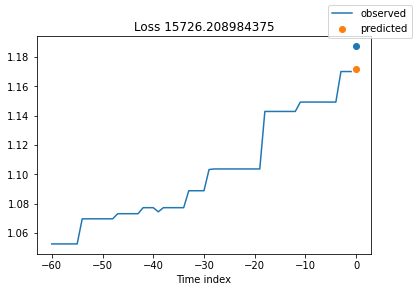

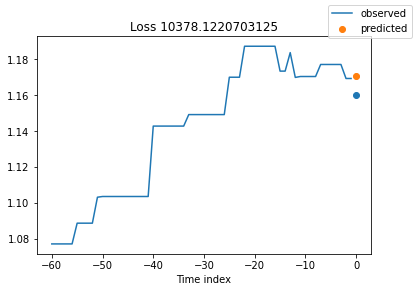

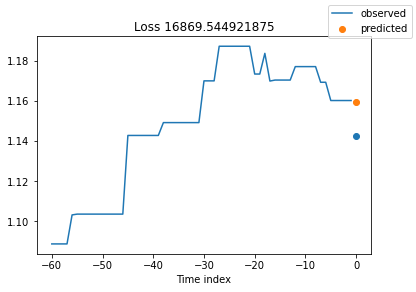

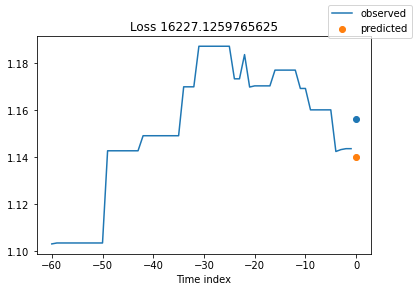

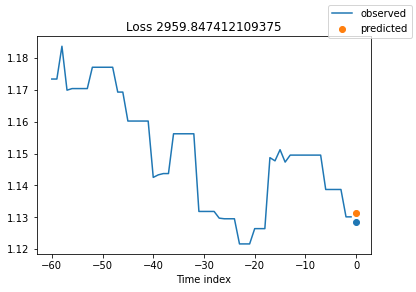

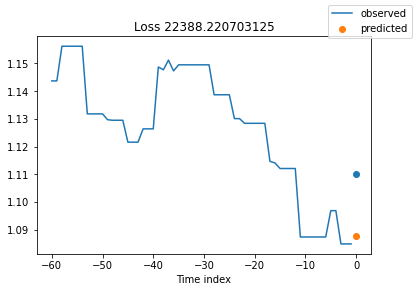

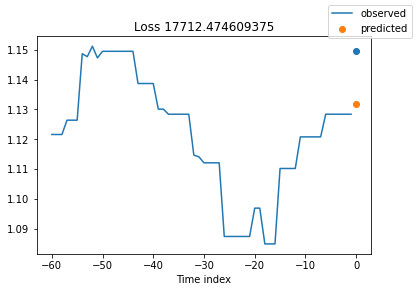

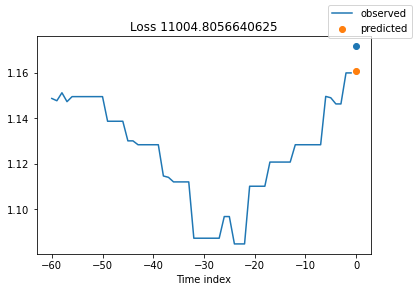

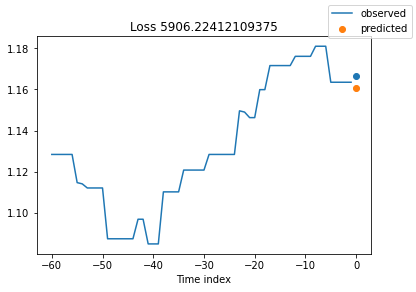

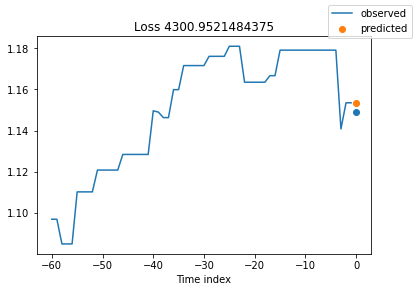

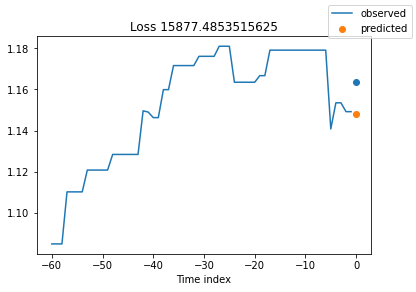

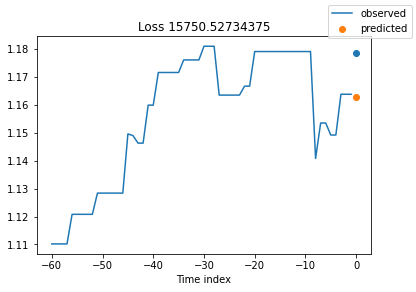

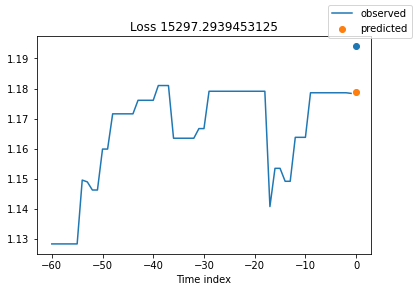

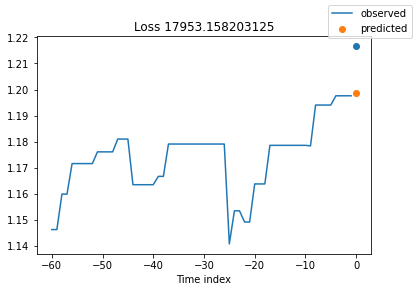

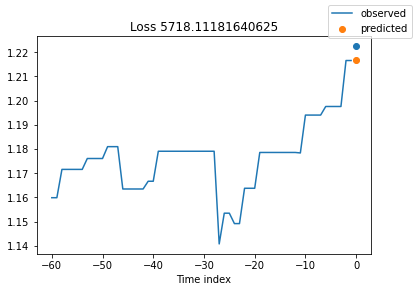

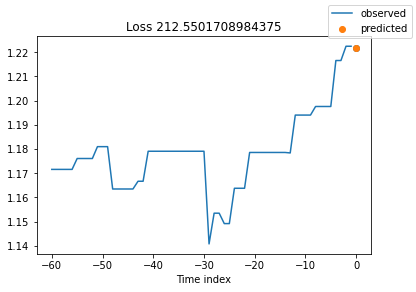

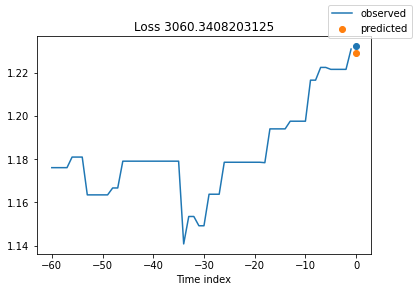

In [2]:
raw_predictions, x = best_model.predict(val_dataloader, mode="raw", return_x=True)
for idx in range(50):  # plot 10 examples
    best_model.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);